This is a programming exercise to help become more comfortable using python and exploring a data set to 
retrieve information to make recommendations.  
The data set is called Cardio Good Fitness and has information on customer's purchasing habits with treadmills.
The following items are expected to be part of this notebook:
customer profile
various variables
uni-variate analysis
bivariate analysis
explore differences between customers 
generate insightful information to help Cardio Good Fitness make decisions driven by their data

In [135]:
#Import the necessary packages such as pandas, numpy, seaborn for 
#displaying graphs and plots 
#also import matplotlib.pyplot
#import warnings to prevent those from appearing in the file

In [136]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.5f'% x) #to minimize the number of decimal places displayed

In [137]:
cardio = pd.read_csv("CardioGoodFitness (1).csv") #import dataset

In [138]:
cardio.head(10) #view the first 10 rows of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [139]:
cardio.describe(include="all") #provides information such as mean, std, min & max

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00000,180,180.00000,180,180.00000,180.00000,180.00000,180.00000
unique,3,nan,2,nan,2,nan,nan,nan,nan
top,TM195,nan,Male,nan,Partnered,nan,nan,nan,nan
freq,80,nan,104,nan,107,nan,nan,nan,nan
mean,NaN,28.78889,NaN,15.57222,NaN,3.45556,3.31111,53719.57778,103.19444
std,NaN,6.94350,NaN,1.61705,NaN,1.08480,0.95887,16506.68423,51.86360
min,NaN,18.00000,NaN,12.00000,NaN,2.00000,1.00000,29562.00000,21.00000
25%,NaN,24.00000,NaN,14.00000,NaN,3.00000,3.00000,44058.75000,66.00000
50%,NaN,26.00000,NaN,16.00000,NaN,3.00000,3.00000,50596.50000,94.00000
75%,NaN,33.00000,NaN,16.00000,NaN,4.00000,4.00000,58668.00000,114.75000


Observations:
Mean customer age is around 28. The largest concentration is between 24 and 33.
Most customers have around 16 years of education; meaning bachelor degree.
Customers plan to use the treadmill 3-4 days per week.
Customers grade themselves at an average level of fitness.
The distance the customer plans to run a week is 66-115 miles.
Customers income is between 44k-58k.

In [140]:
cardio.shape #displays number of entries and number of columns

(180, 9)

Observations thus far: we have 180 observations and 9 columns.

In [141]:
cardio.info() #provides number and name of columns and rows. Datatypes that are objects will change to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [142]:
#No missing values

In [143]:
cardio['Gender'] = cardio['Gender'].astype('category') #datatypes changed to category

In [144]:
cardio['MaritalStatus'] = cardio['MaritalStatus'].astype('category') #datatypes changed to category

In [145]:
cardio['Product'] = cardio['Product'].astype('category') #datatypes changed to category

In [146]:
cardio.info() #running cardio.info again to make sure datatypes are changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [147]:
cardio.skew() #looking for skewness

Age         0.98216
Education   0.62229
Usage       0.73949
Fitness     0.45480
Income      1.29178
Miles       1.72450
dtype: float64

Observations:
1. Age, Education and Usage are skewed in a fairly positive direction (0.5<x<1.0).
2. Income and miles are particularly skewed positive (x>1.0).


After changing datatypes, no missing data and checking for skewed values;
can now look into graphical details to observe trends as well as look more
more in depth at trends.
First type is Univariate Analysis

The following plots based on categorical varaiables

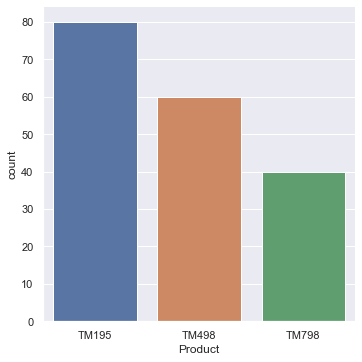

In [148]:
sns.catplot(x = 'Product', data = cardio, kind = 'count');

Observation: TM195 appears to be the treadmill model most customer's purchase.

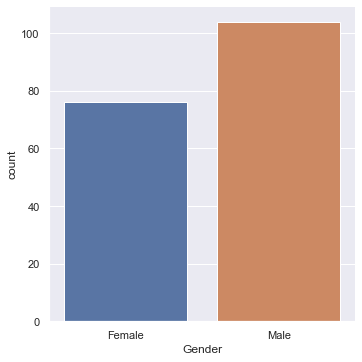

In [149]:
sns.catplot(x = 'Gender', data = cardio, kind = 'count');

Observation: Indicates more males made purchases. 

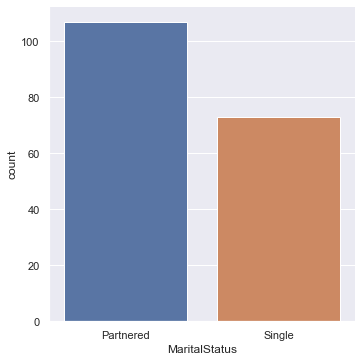

In [150]:
sns.catplot(x = 'MaritalStatus', data = cardio, kind = 'count');

Observation: Indicates partnered individuals purchased more treadmills versus single individuals.

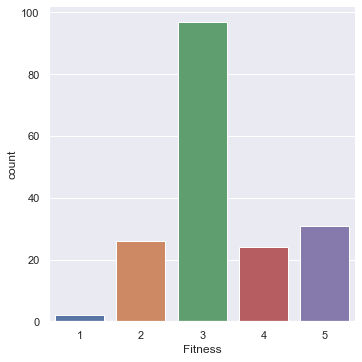

In [151]:
sns.catplot(x = 'Fitness', data = cardio, kind ='count');

In [152]:
cardio['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Histogram visualizations based on Age, Education,Usage,Fitness, Income & Miles

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

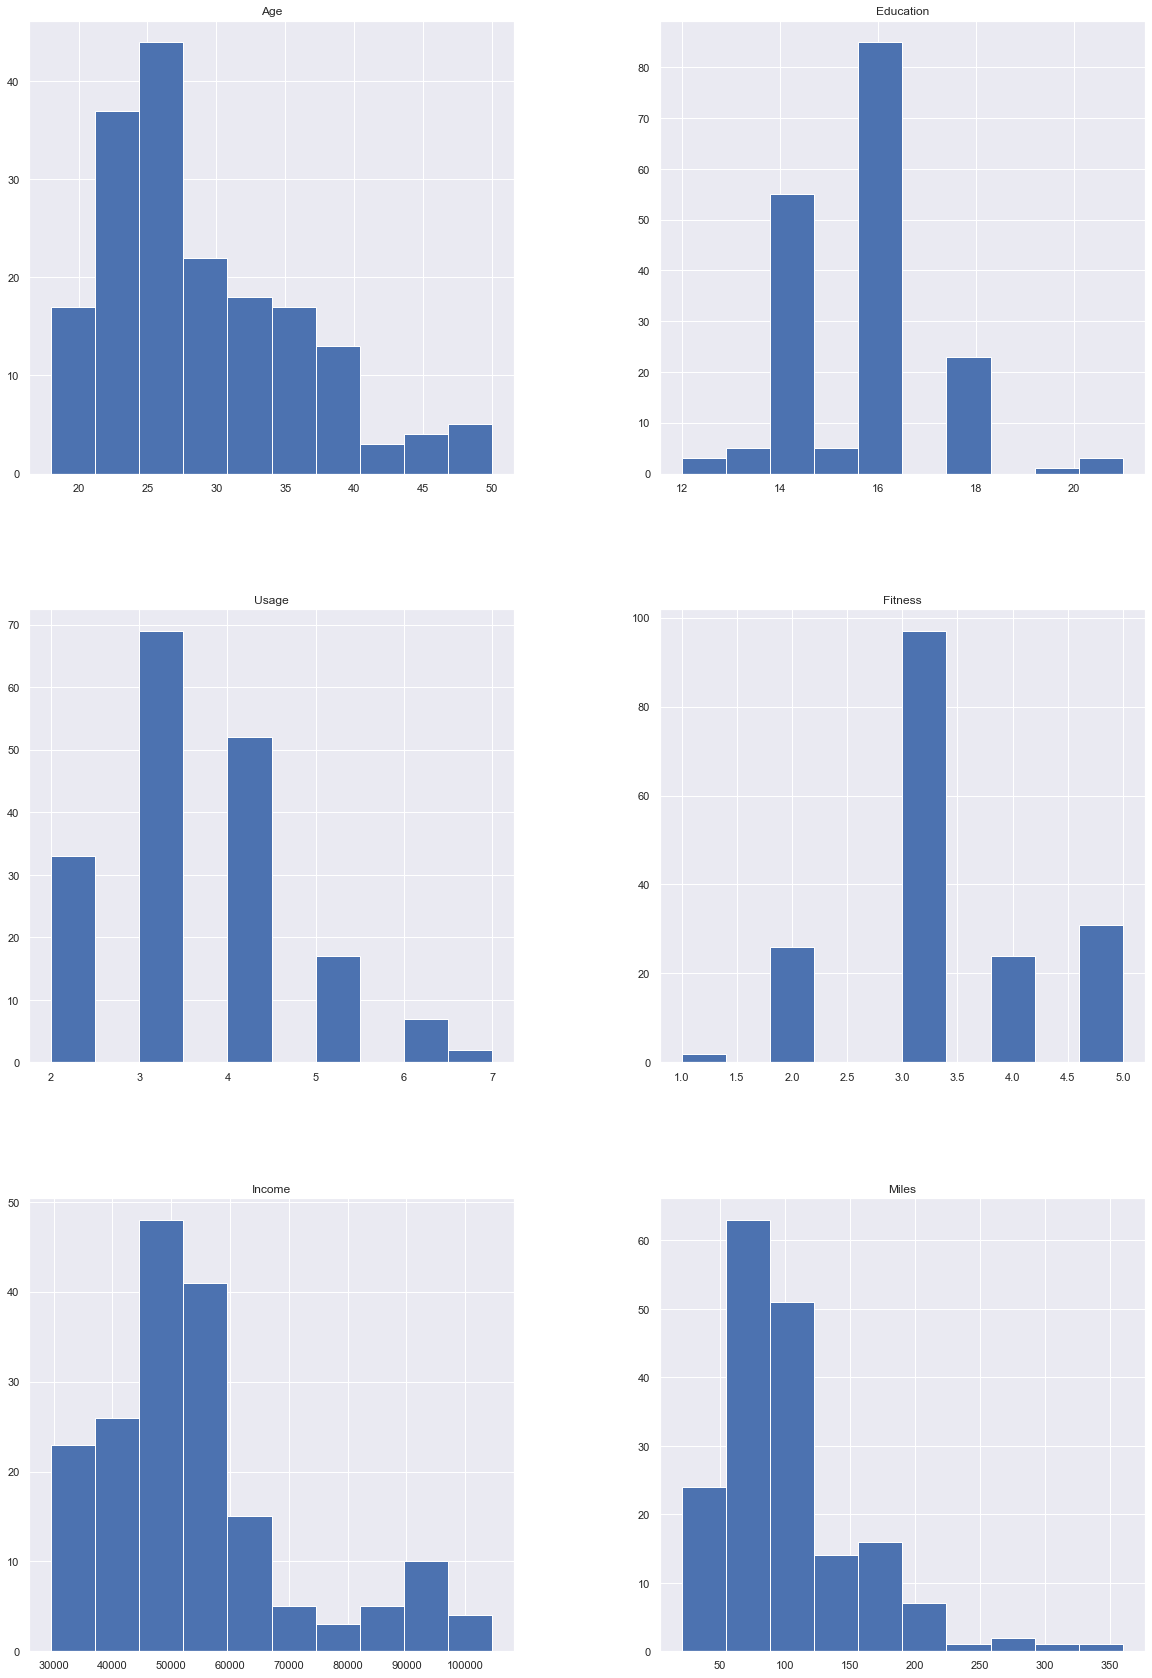

In [153]:
cardio.hist(figsize=(20,30)) #histograms provide a quick understanding of numerical variables

Observations based on the histograms:
1.Age, Education and Usage visualize the fairly positive skewness as observed above.
2.Income and miles show particularly positive skew as observed above.

Next, a few boxplots that show outliers and the three quartile values
along with whiskers.

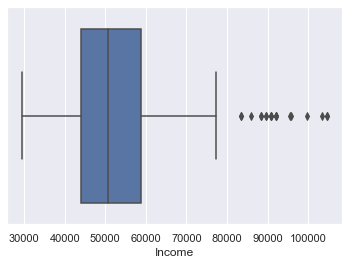

In [154]:
sns.boxplot(cardio['Income']);

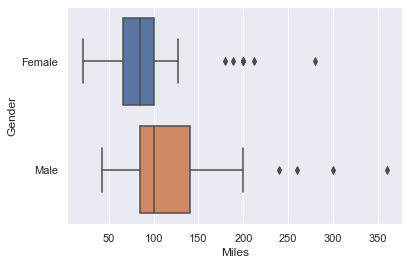

In [155]:
sns.boxplot(cardio['Miles'], cardio['Gender']); #miles by gender

By Gender

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

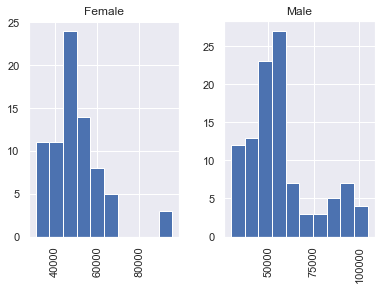

In [156]:
cardio.hist(by='Gender',column = 'Income') #histogram comparing gender versus income

In [157]:
pd.crosstab(cardio['Product'],cardio['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


Observations:
1. Income is situated between the mid 40k range to late 50k range which is the same from the describe at the beginning 
of the analysis.
2. The boxplot indicates that more males will do more mileage than their female counterparts.
3. Men and women purchase model TM195 equally.
4. Men slightly out earn women based on the histogram.

Let's take a look at Multivariate visualizations to see what information 
can be discovered.

In [158]:
cardio.cov() #estimates a covariance matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,48.21217,3.14941,0.11347,0.40683,58844.46344,13.18653
Education,3.14941,2.61487,0.69317,0.63662,16704.71782,25.77079
Usage,0.11347,0.69317,1.17678,0.69547,9303.04258,42.70981
Fitness,0.40683,0.63662,0.69547,0.91943,8467.92539,39.07325
Income,58844.46344,16704.71782,9303.04258,8467.92539,272470624.14475,465265.36189
Miles,13.18653,25.77079,42.70981,39.07325,465265.36189,2689.83349


In [159]:
corr = cardio.corr() #correlation coefficient
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00000,0.28050,0.01506,0.06110,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.41058,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.66861,0.51954,0.75913
Fitness,0.06110,0.41058,0.66861,1.00000,0.53501,0.78570
Income,0.51341,0.62583,0.51954,0.53501,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.78570,0.54347,1.00000


<AxesSubplot:>

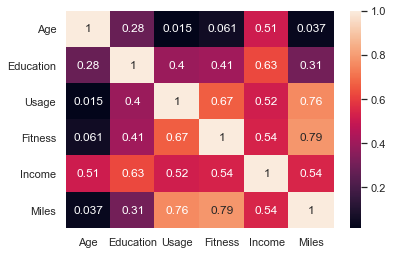

In [160]:
sns.heatmap(corr,annot= True) #heatmap is an excellent visualization because of its coloring

The pairplot (below) help to visualize different variables plotted against each other and visualize relationships.

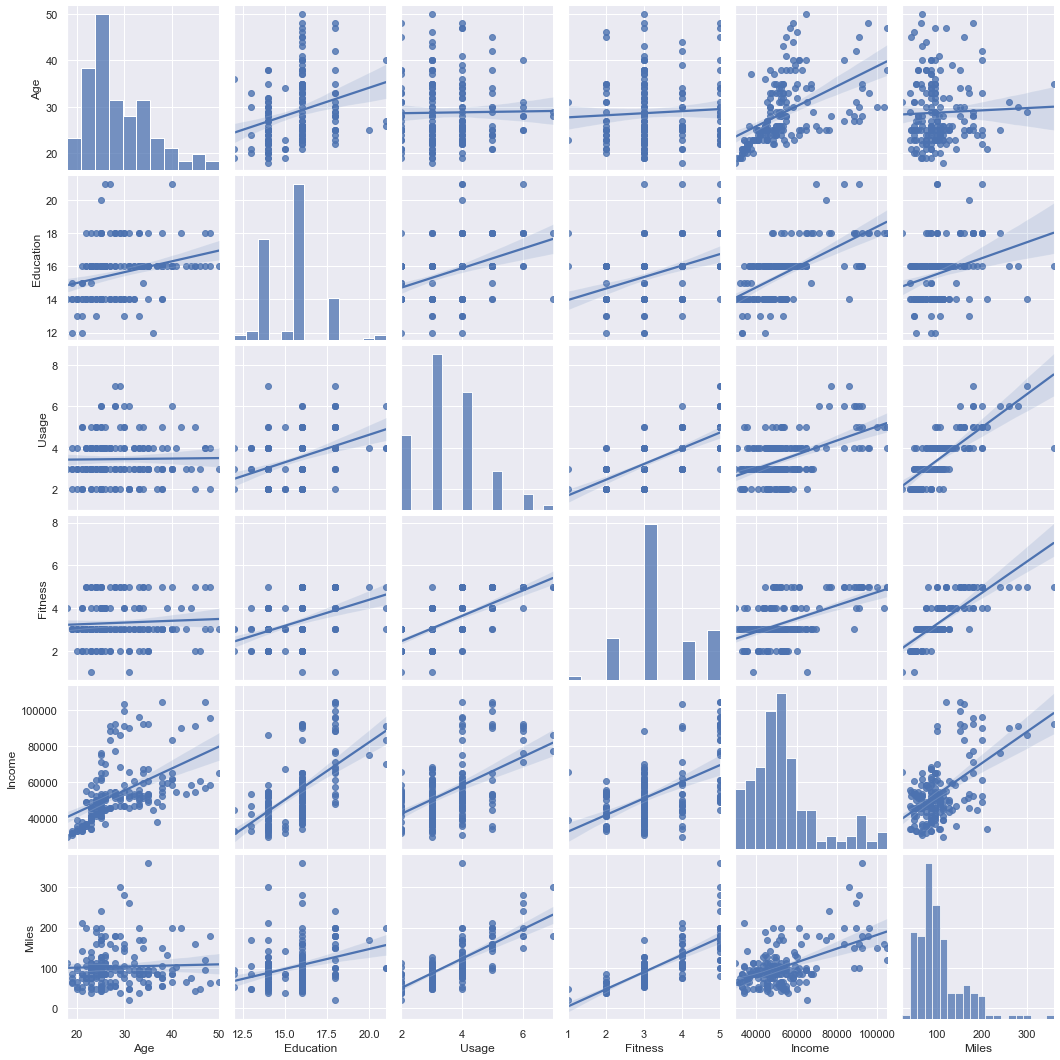

In [161]:
sns.pairplot(cardio,kind='reg')
plt.show()

<AxesSubplot:xlabel='Product', ylabel='count'>

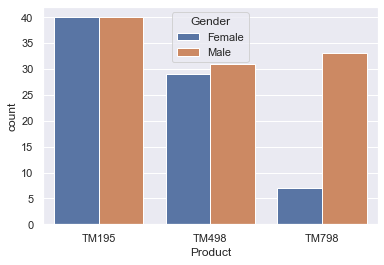

In [162]:
sns.countplot(x='Product', hue = 'Gender', data = cardio) #shows counts of observations

Observation: 
Indicates that both males and females purchased the TM195 and the TM498 at comparable rate

Boxenplot shows more quartiles than Boxplt

<AxesSubplot:xlabel='Gender', ylabel='Age'>

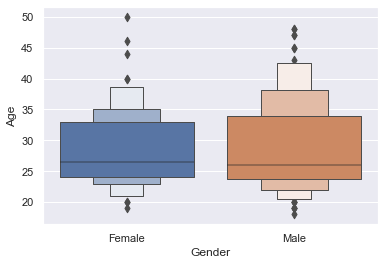

In [163]:
sns.boxenplot(x='Gender', y = 'Age', data = cardio)  #this plot shows outliers and quartile values 

<AxesSubplot:xlabel='Gender', ylabel='Age'>

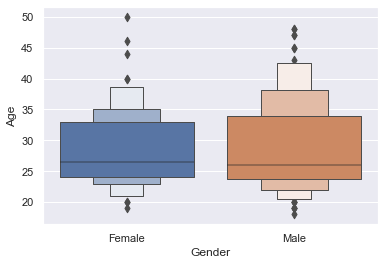

In [164]:
sns.boxenplot(x='Gender', y = 'Age', data = cardio) #this plot shows outliers and the quartile values 

Scatterplot

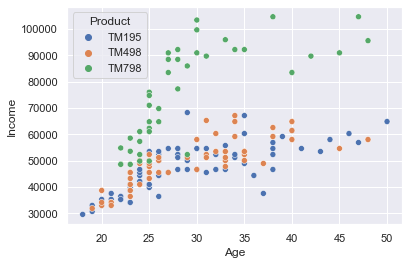

In [165]:
sns.scatterplot(x='Age', y='Income',data=cardio, hue = 'Product')
plt.show()

Final Insights and Recommendations
1. Based on these analyses, the data possibly infers that women and men purchase the same model despite a slight difference in income.
2. TM798 appears to be the treadmill purchased by both men and women.
3. Based on the scatterplot, TM798 is the most expensive model.
4. Cardio Good Fitness should continue to look for additional insights to better target their products.